<a href="https://colab.research.google.com/github/dawidSkowron20/data-science-bootcamp/blob/main/analiza_danych_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek

In [ ]:
import pandas as pd
import numpy as np


Załadowanie danych

In [ ]:
def fetch_financial_data(company = 'UBER'):
  """Pobieranie danych dotyczących notowań spółek na giełdzie według symboli
      na stronie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2022-04-04 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    732 non-null    float64
 1   High    732 non-null    float64
 2   Low     732 non-null    float64
 3   Close   732 non-null    float64
 4   Volume  732 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-18,32.52,33.420,32.33,33.36,35827779
2022-03-17,32.34,32.920,31.57,32.85,27278649
2022-03-16,30.53,32.635,30.27,32.61,34688771
2022-03-15,29.52,30.410,29.06,29.80,33060463
2022-03-14,30.51,30.550,28.80,29.27,41897395
...,...,...,...,...,...
2019-05-16,41.48,44.060,41.25,43.00,38115524
2019-05-15,39.37,41.880,38.95,41.29,36086065
2019-05-14,38.31,39.960,36.85,39.96,46661147


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-18,32.52,33.420,32.33,33.36,35827779
2022-03-17,32.34,32.920,31.57,32.85,27278649
2022-03-16,30.53,32.635,30.27,32.61,34688771


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-05-16,41.48,44.06,41.25,43.00,38115524
2019-05-15,39.37,41.88,38.95,41.29,36086065
2019-05-14,38.31,39.96,36.85,39.96,46661147
2019-05-13,38.79,39.24,36.08,37.10,79442420
2019-05-10,42.00,45.00,41.06,41.57,186322536


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df.describe()

,open,high,low,close,volume
count,721.000000,721.000000,721.000000,721.000000,7.210000e+02
mean,40.205005,41.001095,39.299879,40.145173,2.469972e+07
std,9.208780,9.268681,9.085897,9.152692,1.694645e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,32.750000,33.420000,32.040000,32.800000,1.422676e+07
50%,39.060000,40.000000,38.080000,39.050000,2.065422e+07
75%,46.720000,47.540000,45.910000,46.470000,3.009952e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,721.0,4.020500e+01,9.208780e+00,15.96,32.75,39.06,46.72,6.325000e+01
high,721.0,4.100109e+01,9.268681e+00,17.80,33.42,40.00,47.54,6.405000e+01
low,721.0,3.929988e+01,9.085897e+00,13.71,32.04,38.08,45.91,6.080000e+01
close,721.0,4.014517e+01,9.152692e+00,14.82,32.80,39.05,46.47,6.318000e+01
volume,721.0,2.469972e+07,1.694645e+07,3380003.00,14226758.00,20654223.00,30099525.00,1.863225e+08


Eksploracja danych

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2022-03-18,32.52,33.4200,32.3300,33.36,35827779
2022-03-17,32.34,32.9200,31.5700,32.85,27278649
2022-03-16,30.53,32.6350,30.2700,32.61,34688771
2022-03-15,29.52,30.4100,29.0600,29.80,33060463
2022-03-14,30.51,30.5500,28.8000,29.27,41897395
2022-03-11,31.30,31.3900,30.4200,30.76,29454687
2022-03-10,30.86,31.1450,29.8400,30.41,30785877
2022-03-09,31.75,32.7300,31.2000,31.50,33734505
2022-03-08,28.51,31.5700,28.2777,30.74,55014737


In [ ]:
df['open']

Date
2022-03-18    32.52
2022-03-17    32.34
2022-03-16    30.53
2022-03-15    29.52
2022-03-14    30.51
2022-03-11    31.30
2022-03-10    30.86
2022-03-09    31.75
2022-03-08    28.51
2022-03-07    31.48
Name: open, dtype: float64

In [ ]:
df.open

Date
2022-03-18    32.52
2022-03-17    32.34
2022-03-16    30.53
2022-03-15    29.52
2022-03-14    30.51
2022-03-11    31.30
2022-03-10    30.86
2022-03-09    31.75
2022-03-08    28.51
2022-03-07    31.48
Name: open, dtype: float64

In [ ]:
df[['open']]

,open
Date,
2022-03-18,32.52
2022-03-17,32.34
2022-03-16,30.53
2022-03-15,29.52
2022-03-14,30.51
2022-03-11,31.30
2022-03-10,30.86
2022-03-09,31.75
2022-03-08,28.51


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2022-03-18,32.52,33.36
2022-03-17,32.34,32.85
2022-03-16,30.53,32.61
2022-03-15,29.52,29.80
2022-03-14,30.51,29.27
2022-03-11,31.30,30.76
2022-03-10,30.86,30.41
2022-03-09,31.75,31.50
2022-03-08,28.51,30.74


In [ ]:
df.iloc[:,0]

Date
2022-03-18    32.52
2022-03-17    32.34
2022-03-16    30.53
2022-03-15    29.52
2022-03-14    30.51
2022-03-11    31.30
2022-03-10    30.86
2022-03-09    31.75
2022-03-08    28.51
2022-03-07    31.48
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2022-03-18,32.52,33.36
2022-03-17,32.34,32.85
2022-03-16,30.53,32.61
2022-03-15,29.52,29.80
2022-03-14,30.51,29.27
2022-03-11,31.30,30.76
2022-03-10,30.86,30.41
2022-03-09,31.75,31.50
2022-03-08,28.51,30.74


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-03-18,33.36,35827779
2022-03-17,32.85,27278649
2022-03-16,32.61,34688771
2022-03-15,29.80,33060463
2022-03-14,29.27,41897395
2022-03-11,30.76,29454687
2022-03-10,30.41,30785877
2022-03-09,31.50,33734505
2022-03-08,30.74,55014737


In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2022-03-18,35827779
2022-03-17,27278649
2022-03-16,34688771
2022-03-15,33060463
2022-03-14,41897395
2022-03-11,29454687
2022-03-10,30785877
2022-03-09,33734505
2022-03-08,55014737


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2022-03-18,32.52,33.4200,32.3300,33.36,35827779
2022-03-17,32.34,32.9200,31.5700,32.85,27278649
2022-03-16,30.53,32.6350,30.2700,32.61,34688771
2022-03-15,29.52,30.4100,29.0600,29.80,33060463
2022-03-14,30.51,30.5500,28.8000,29.27,41897395
2022-03-11,31.30,31.3900,30.4200,30.76,29454687
2022-03-10,30.86,31.1450,29.8400,30.41,30785877
2022-03-09,31.75,32.7300,31.2000,31.50,33734505
2022-03-08,28.51,31.5700,28.2777,30.74,55014737


In [ ]:
df.iloc[0]

open            32.52
high            33.42
low             32.33
close           33.36
volume    35827779.00
Name: 2022-03-18 00:00:00, dtype: float64

In [ ]:
df.iloc[0:3,:] # łatwe do zapamiętania

,open,high,low,close,volume
Date,,,,,
2022-03-18,32.52,33.420,32.33,33.36,35827779
2022-03-17,32.34,32.920,31.57,32.85,27278649
2022-03-16,30.53,32.635,30.27,32.61,34688771


In [ ]:
df.iloc[:3]  # analogiczne do poprzedniego

,open,high,low,close,volume
Date,,,,,
2022-03-18,32.52,33.420,32.33,33.36,35827779
2022-03-17,32.34,32.920,31.57,32.85,27278649
2022-03-16,30.53,32.635,30.27,32.61,34688771


In [ ]:
df.loc['2022-03-18']

,open,high,low,close,volume
Date,,,,,
2022-03-18,32.52,33.42,32.33,33.36,35827779


Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2022-04-04 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    732 non-null    float64
 1   High    732 non-null    float64
 2   Low     732 non-null    float64
 3   Close   732 non-null    float64
 4   Volume  732 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-04,36.40,36.9300,36.215,36.51,20230463
2022-04-01,35.68,36.4800,35.400,35.98,16793293
2022-03-31,36.50,36.7300,35.370,35.68,20608652
2022-03-30,36.66,37.0885,36.205,36.58,22306544
2022-03-29,35.57,37.4500,35.570,37.19,37969049


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,732.000000,732.000000,732.000000,732.000000,7.320000e+02
mean,40.122279,40.917142,39.221793,40.066298,2.473397e+07
std,9.165801,9.225707,9.041771,9.108082,1.686814e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,32.802500,33.470000,32.055000,32.810000,1.425611e+07
50%,38.845000,39.655000,37.612500,38.485000,2.077878e+07
75%,46.532500,47.462500,45.812500,46.402500,3.014189e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-04,36.40,36.9300,36.215,36.51,20230463
2022-04-01,35.68,36.4800,35.400,35.98,16793293
2022-03-31,36.50,36.7300,35.370,35.68,20608652
2022-03-30,36.66,37.0885,36.205,36.58,22306544
2022-03-29,35.57,37.4500,35.570,37.19,37969049


In [ ]:
df['Average'] = (df['Open'] + df['Close']) / 2.0
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-04-04,36.40,36.9300,36.215,36.51,20230463,36.455
2022-04-01,35.68,36.4800,35.400,35.98,16793293,35.830
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380
...,...,...,...,...,...,...
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135


In [ ]:
df = df.sort_index()
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090


In [ ]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2022-03-29,34.77
2022-03-30,37.19
2022-03-31,36.58


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29
...,...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090,36.58


In [ ]:
df['Daily-change'] = df['Close'] / df['Close_shift'] - 1
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily-change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090,36.58,-0.024604


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily-change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090,36.58,-0.024604


In [ ]:
df = df.rename(columns = {"Daily-change" : "Daily_change"})

In [ ]:
df.Daily_change.min()

-0.21628767847699626

In [ ]:
df.Daily_change.max()

0.3825910931174088

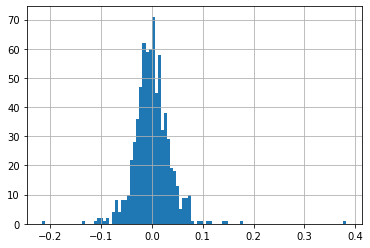

In [ ]:
df.Daily_change.hist(bins=100)

In [ ]:
import seaborn as sns
sns.set()

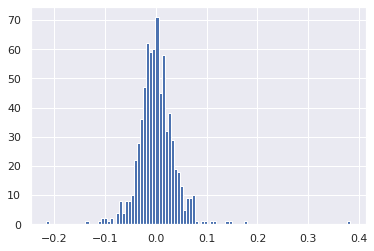

In [ ]:
df.Daily_change.hist(bins=100)

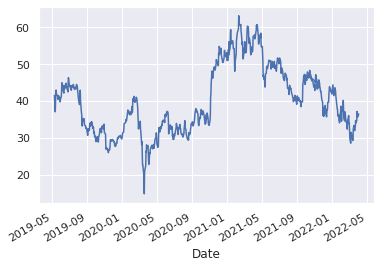

In [ ]:
df['Close'].plot()

Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090,36.58,-0.024604


In [ ]:
df[df.Daily_change > 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.500,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.410,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-03-24,34.74,34.95,33.440,34.70,52533577,34.720,33.06,0.049607
2022-03-28,34.14,34.91,33.730,34.77,22175227,34.455,34.06,0.020846
2022-03-29,35.57,37.45,35.570,37.19,37969049,36.380,34.77,0.069600


In [ ]:
df[df.Daily_change < 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-03-03,34.22,34.2914,31.415,31.72,38337646,32.970,34.04,-0.068155
2022-03-04,31.50,31.7300,29.270,29.83,52160494,30.665,31.72,-0.059584
2022-03-07,31.48,31.9384,28.550,28.57,60265807,30.025,29.83,-0.042239


In [ ]:
df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-03-11,31.30,31.390,30.42,30.76,29454687,31.030,30.41,0.011509
2022-03-15,29.52,30.410,29.06,29.80,33060463,29.660,29.27,0.018107
2022-03-16,30.53,32.635,30.27,32.61,34688771,31.570,29.80,0.094295


In [ ]:
df_positive.Daily_change.mean()

0.027088104872167045

In [ ]:
df_negative =  df[df.Daily_change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-03-03,34.22,34.2914,31.415,31.72,38337646,32.970,34.04,-0.068155
2022-03-04,31.50,31.7300,29.270,29.83,52160494,30.665,31.72,-0.059584
2022-03-07,31.48,31.9384,28.550,28.57,60265807,30.025,29.83,-0.042239


In [ ]:
df_negative.Daily_change.mean()

-0.024455518559676405

In [ ]:
df[df.Close == df.High] # w ciągu danej sesji giełdowej notowania spółki zamnkęły
                        # się na maksimum, nastepny dzień będzie obiecujący

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-03-14    False
2022-03-15    False
2022-03-16    False
2022-03-17    False
2022-03-18    False
Length: 721, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112


In [ ]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-04,31.45,31.750,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2022-03-14,30.51,30.550,28.800,29.27,41897395,29.890,30.76,-0.048440
2022-03-15,29.52,30.410,29.060,29.80,33060463,29.660,29.27,0.018107
2022-03-16,30.53,32.635,30.270,32.61,34688771,31.570,29.80,0.094295


In [ ]:
 df[(df.index >= '2019-11-01') & (df.index <= '2019-11-15')] # wycinanie z dwoma
                                                             # ograniczeniami

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090,36.58,-0.024604


In [ ]:
df[(df.index.month == 5) & (df.index.year == 2019)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
